# Optical Character Recognition (OCR)

## 1. Tesseract (Google)

✅ Good for printed text<br>
✅ Faster for simple text<br>
✅ 100+ languages<br>

❌ Bad for handwriting<br>
❌ Need to install Tesseract-OCR<br>
❌ Need preprocessing

In [8]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

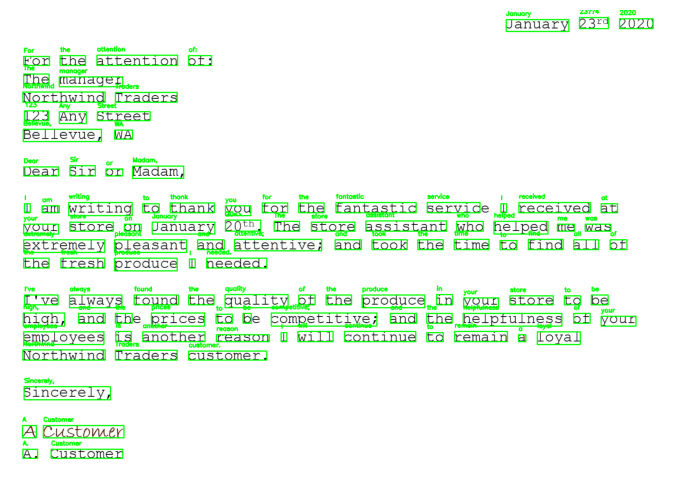

January 23°4 2020

For the attention of:
The manager
Northwind Traders

123 Any Street
Bellevue, WA

Dear Sir or Madam,

I am writing to thank you for the fantastic service I received at
your store on January 20*>. The store assistant who helped me was
extremely pleasant and attentive; and took the time to find all of
the fresh produce I needed.

I've always found the quality of the produce in your store to be
high, and the prices to be competitive; and the helpfulness of your
employees is another reason I will continue to remain a loyal
Northwind Traders customer.

Sincerely,

A Customer
A. Customer



In [10]:
# load image
img_path = "./data/letter.jpg"
img = cv2.imread(img_path)

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# thresholding
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# get text
text = pytesseract.image_to_string(gray)

# get bounding box coordinates
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# draw bounding boxes
for i in range(len(data["text"])):
    if data["text"][i].strip():  # ignore empty strings
        x, y, w, h = (
            data["left"][i],
            data["top"][i],
            data["width"][i],
            data["height"][i],
        )
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(
            img,
            data["text"][i],
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2,
        )

# display image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()

# print text
print(text)

## 2. EasyOCR

✅ Good for handwritten text and fancy fonts<br>
✅ Minimal preprocessing<br>

❌ Slower due to deep learning<br>
❌ 80+ languages<br>

In [11]:
import cv2
import easyocr

In [29]:
def easyocr_ocr(img_path):
    # initialize EasyOCR reader
    reader = easyocr.Reader(["en"])

    # read image
    img = cv2.imread(img_path)

    # run EasyOCR
    results = reader.readtext(img)

    # print results
    for bbox, text, confidence in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        # cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        print(f"Text: {text}, Confidence: {confidence}, Bounding box: {bbox}")

    # display image
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Text: In, Confidence: 0.6669662078697695, Bounding box: [[54, 4], [90, 4], [90, 30], [54, 30]]
Text: mid -, Confidence: 0.19978686988695557, Bounding box: [[110, 0], [168, 0], [168, 26], [110, 26]]
Text: Analsy, Confidence: 0.6291422714081003, Bounding box: [[238, 0], [340, 0], [340, 46], [238, 46]]
Text: (moirt d, Confidence: 0.21146190370957618, Bounding box: [[6, 36], [72, 36], [72, 62], [6, 62]]
Text: his Rami {y, Confidence: 0.2041786791777428, Bounding box: [[83, 33], [207, 33], [207, 71], [83, 71]]
Text: ntaaz, Confidence: 0.3807982467216053, Bounding box: [[9, 65], [100, 65], [100, 102], [9, 102]]
Text: fom, Confidence: 0.3725205442348176, Bounding box: [[113, 67], [173, 67], [173, 103], [113, 103]]
Text: Rcvnt, Confidence: 0.6710226609893059, Bounding box: [[188, 74], [239, 74], [239, 95], [188, 95]]
Text: to, Confidence: 0.5534401452053693, Bounding box: [[252, 68], [276, 68], [276, 92], [252, 92]]
Text: Napeos,, Confidence: 0.6916520821326227, Bounding box: [[285, 65], [366,

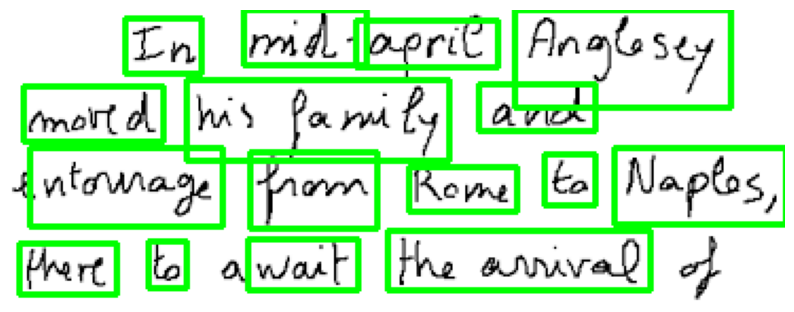

In [30]:
easyocr_ocr("./data/handwritten-text-1.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Text: We Stact With Good, Confidence: 0.3690213397949696, Bounding box: [[0, 11], [289, 11], [289, 72], [0, 72]]
Text: Because, Confidence: 0.7655689886250604, Bounding box: [[12, 86], [94, 86], [94, 116], [12, 116]]
Text: all, Confidence: 0.9909313321113586, Bounding box: [[100, 90], [126, 90], [126, 114], [100, 114]]
Text: businesses should, Confidence: 0.8274387138426006, Bounding box: [[129, 84], [301, 84], [301, 120], [129, 120]]
Text: be, Confidence: 0.9997440096400059, Bounding box: [[16, 120], [46, 120], [46, 144], [16, 144]]
Text: doing, Confidence: 0.860478163694979, Bounding box: [[47, 119], [101, 119], [101, 157], [47, 157]]
Text: Soml, Confidence: 0.526475727558136, Bounding box: [[107, 125], [157, 125], [157, 141], [107, 141]]
Text: thing, Confidence: 0.9626588346325476, Bounding box: [[151, 117], [205, 117], [205, 155], [151, 155]]
Text: Ood, Confidence: 0.5221749934032214, Bounding box: [[228, 118], [270, 118], [270, 142], [228, 142]]


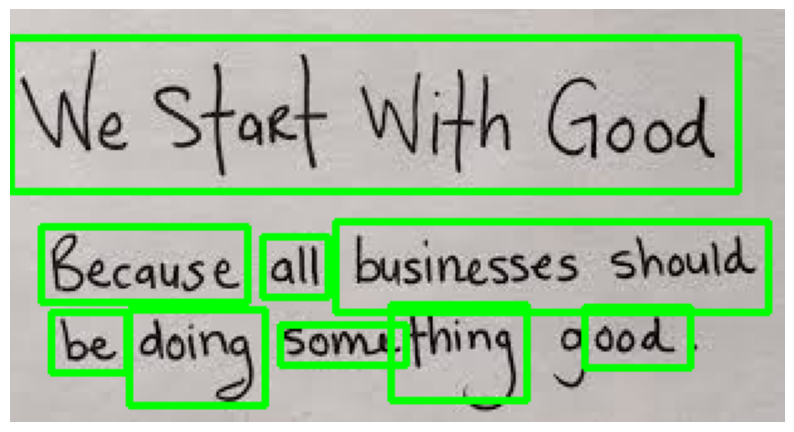

In [31]:
easyocr_ocr("./data/handwritten-text-2.jpg")